In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from opendata import OpenData
from lmfit import minimize, Parameters
from dateutil.parser import parse
import datetime

In [4]:
od = OpenData()

athletes = []
for athlete in od.remote_athletes():
    activities = list(athlete.activities())
    print(activities[0].metadata)
    #pass

In [5]:
athletes = list(od.remote_athletes())

In [6]:
len(athletes)

6613

In [7]:
athlete = athletes[448]

In [8]:
athlete.metadata['ATHLETE']

{'gender': 'M', 'yob': '1979', 'id': '{11bf3ef3-c7b3-4d8d-be36-9021982b51f3}'}

In [9]:
activities = list(athlete.activities())

In [10]:
n = 154

In [11]:
activities[n].metadata

{'date': '2018/11/05 15:26:21 UTC',
 'data': 'TDSPHC-AGL-----',
 'sport': 'Bike',
 'METRICS': {'a_skiba_xpower': ['198.90497', '3131.00000'],
  'a_skiba_relative_intensity': ['0.84640', '3131.00000'],
  'a_skiba_bike_score': '62.30690',
  'a_skiba_variability_index': '1.18095',
  'a_skiba_response_index': '1.47541',
  'a_coggan_np': ['206.86499', '3131.00000'],
  'a_coggan_if': ['0.88028', '3131.00000'],
  'a_coggan_tss': '67.39363',
  'a_coggam_variability_index': ['1.22821', '3131.00000'],
  'a_friel_efficiency_factor': '1.53446',
  'a_coggan_tssperhour': ['77.48868', '0.86972'],
  'aerobic_decoupling': '11.65664',
  'power_index': ['63.33773', '1.00000'],
  'ride_count': '1.00000',
  'workout_time': '3131.00000',
  'time_riding': '3124.00000',
  'total_distance': '28.80733',
  'climb_rating': ['0.17302', '1.00000'],
  'athlete_weight': '80.00000',
  'elevation_gain': '70.60000',
  'elevation_loss': '84.20000',
  'total_work': '527.35000',
  'average_speed': '33.19667',
  'average_po

In [12]:
activities[n]

<AxesSubplot:xlabel='duration', ylabel='power'>

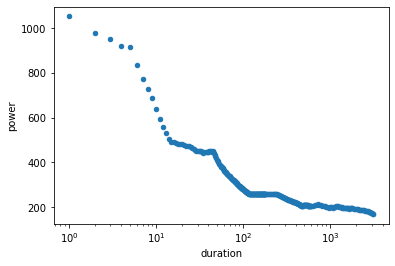

In [13]:
df = pd.DataFrame({'duration':activities[n].metadata['METRICS']['power_mmp_secs'], 'power':activities[n].metadata['METRICS']['power_mmp']})
df.plot('duration', 'power', kind='scatter', logx=True)

In [14]:
activities[n].data

,secs,km,power,hr,cad,alt
0,0,0.00000,59,80,71,9.6
1,1,0.00205,59,81,75,9.6
2,2,0.00462,59,82,77,9.6
3,3,0.00765,59,83,78,9.4
4,4,0.01111,59,83,78,9.4
...,...,...,...,...,...,...
3126,3126,28.80550,0,123,91,-3.2
3127,3127,28.80560,0,123,0,-3.2
3128,3128,28.80560,0,123,0,-3.2
3129,3129,28.80560,0,123,0,-3.2


<AxesSubplot:>

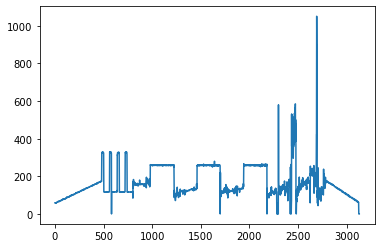

In [15]:
activities[n].data.power.plot()

In [15]:
activities[n].metadata['METRICS']['a_skiba_xpower'][0]

'198.90497'

In [16]:
for activity in activities:
    print(activity.metadata['METRICS']['power_index'])

KeyError: 'power_index'

In [19]:
bike_activities = list()
for activity in activities:
    if 'power_mmp_secs' in activity.metadata['METRICS']:
        bike_activities.append(activity)
len(bike_activities)

232

/Users/mateuszbulanda-gorol/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


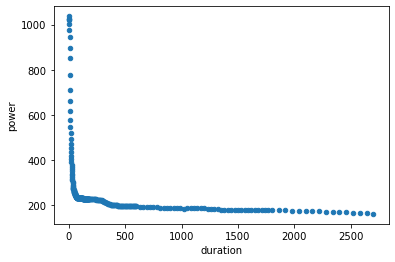

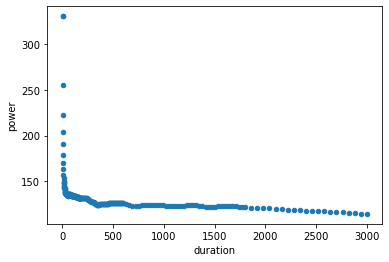

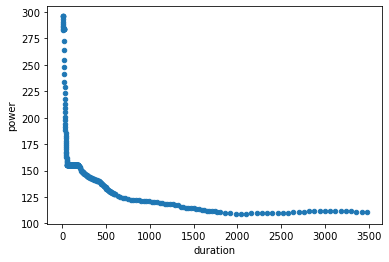

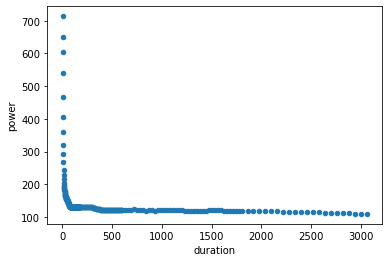

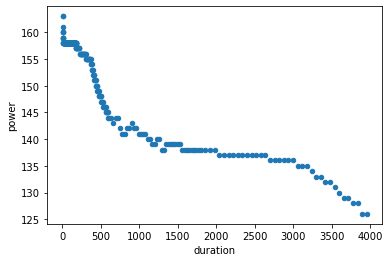

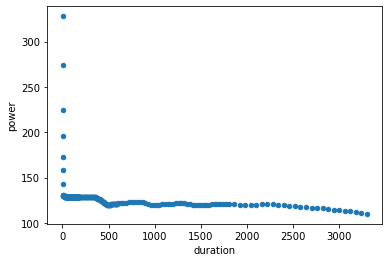

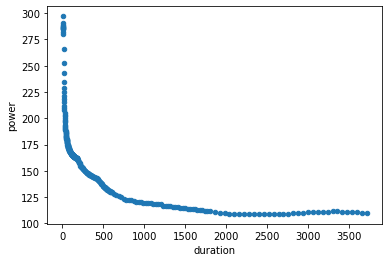

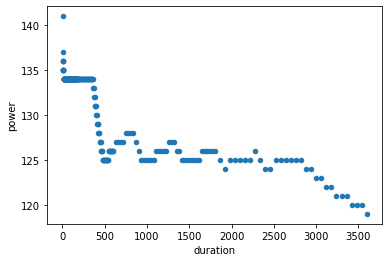

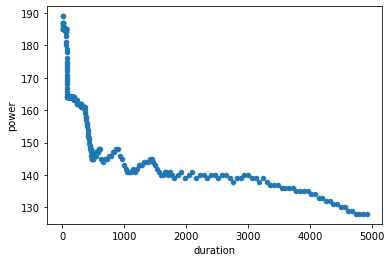

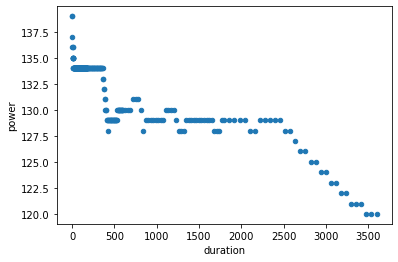

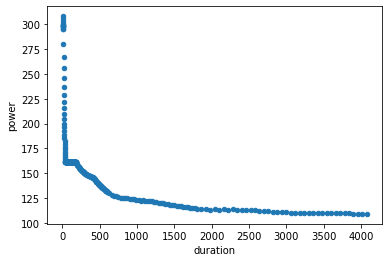

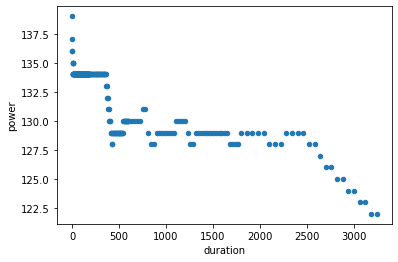

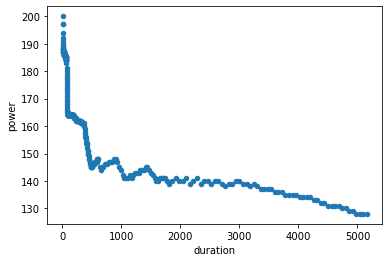

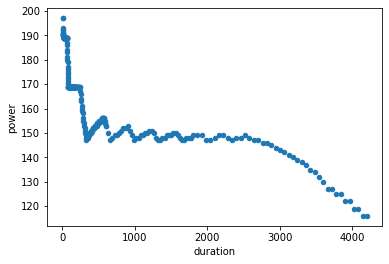

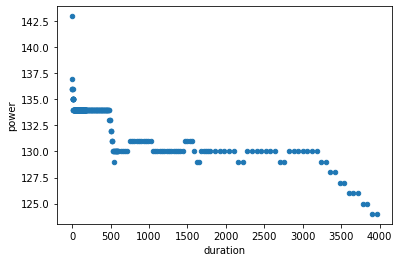

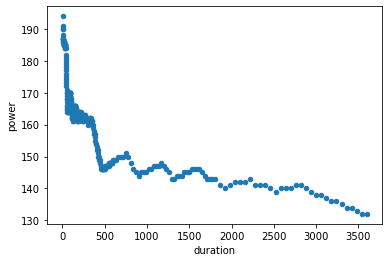

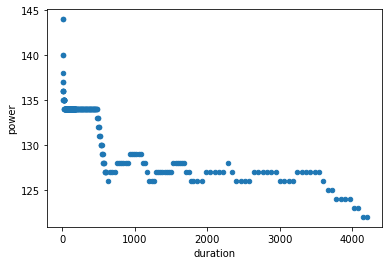

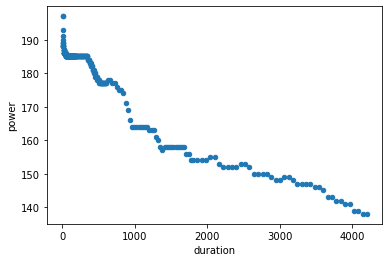

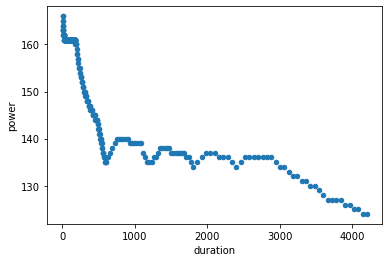

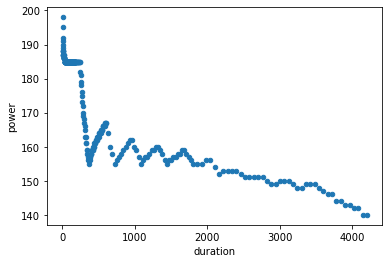

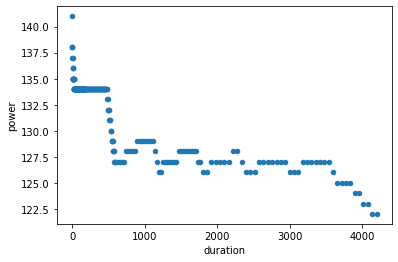

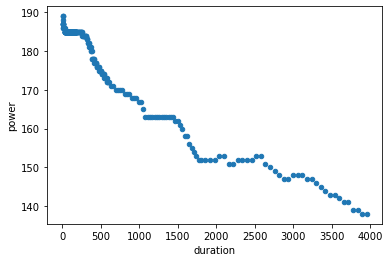

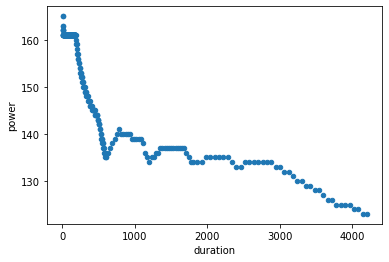

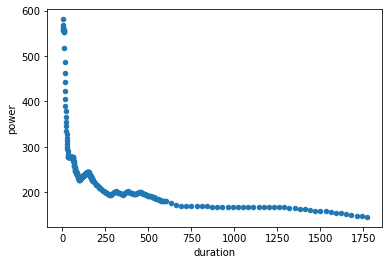

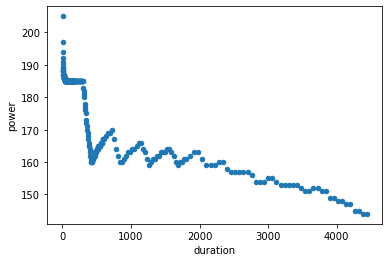

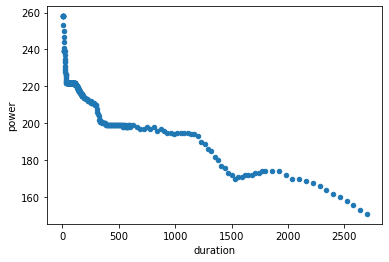

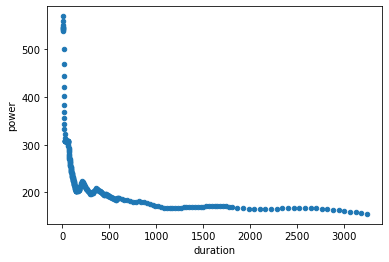

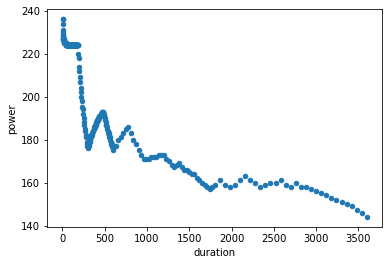

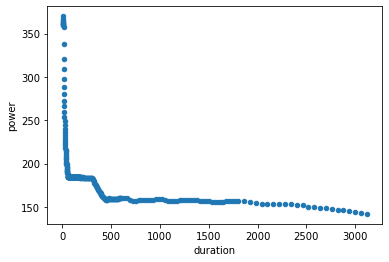

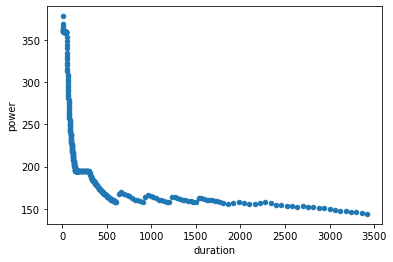

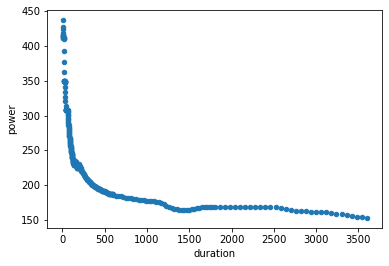

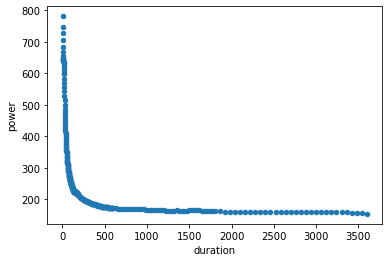

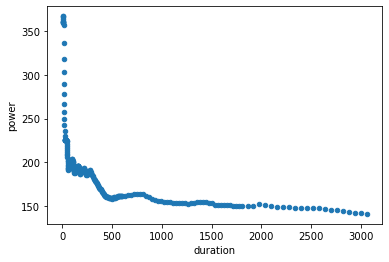

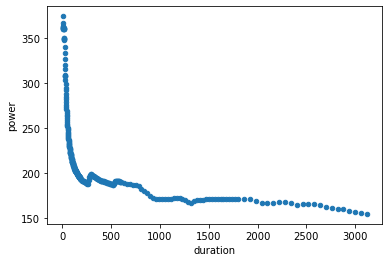

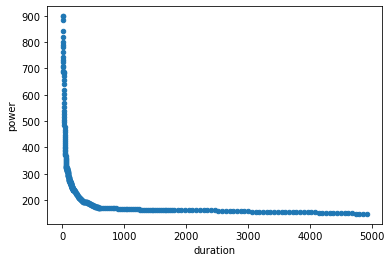

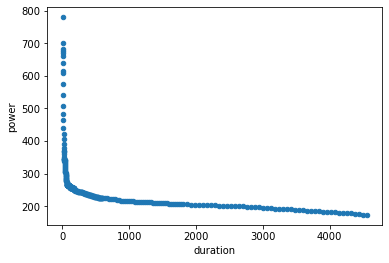

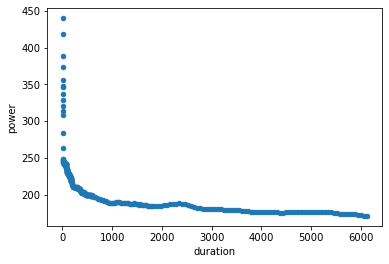

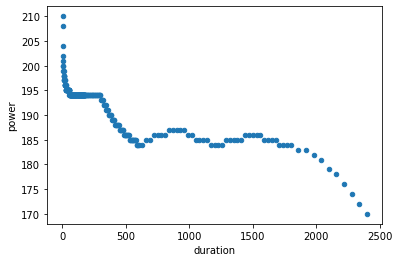

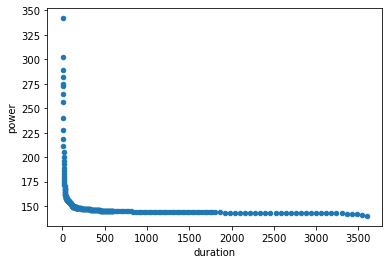

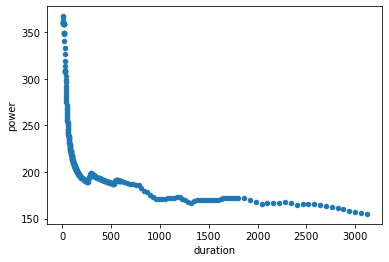

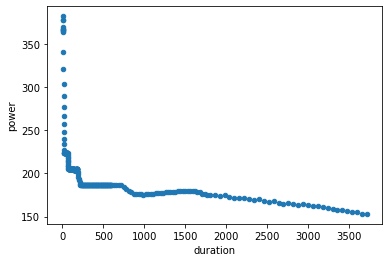

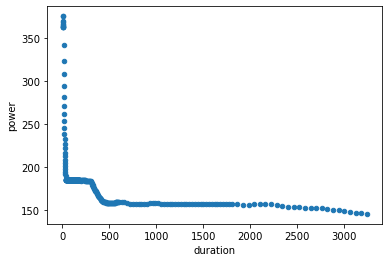

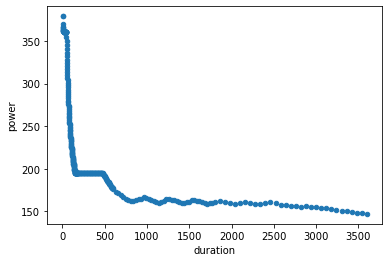

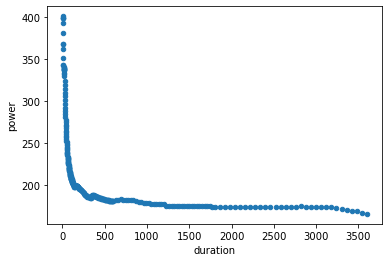

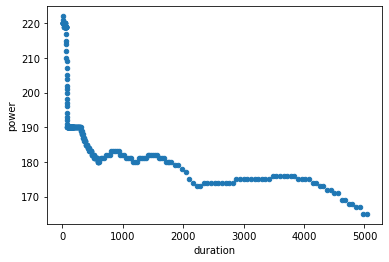

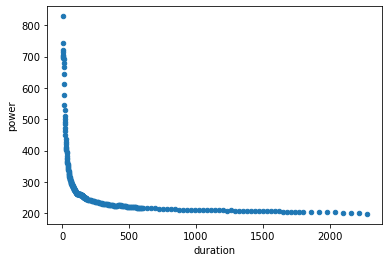

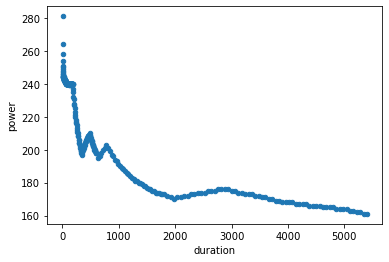

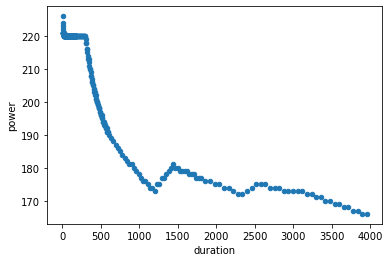

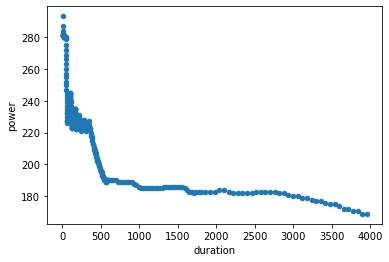

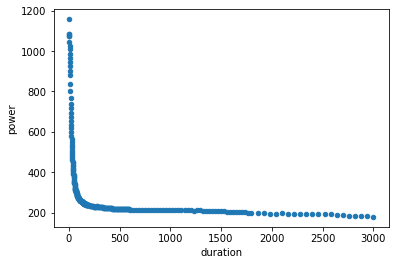

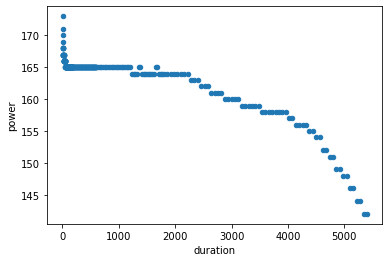

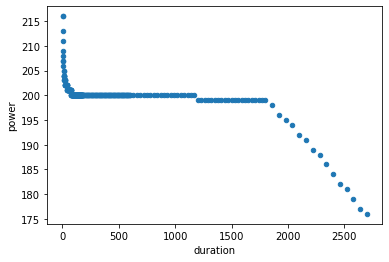

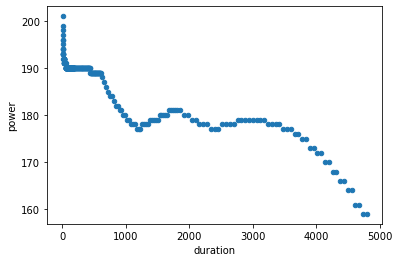

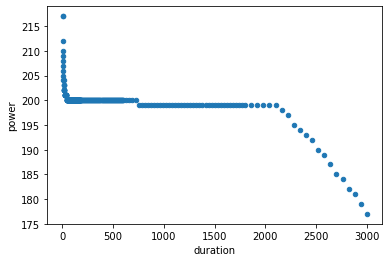

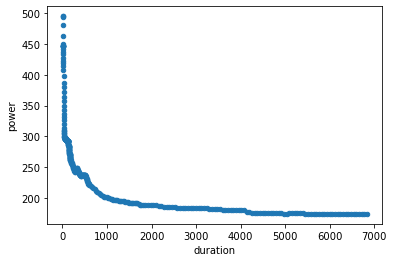

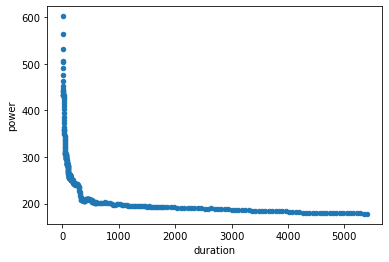

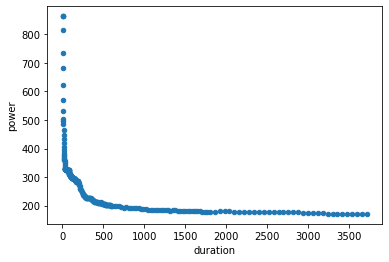

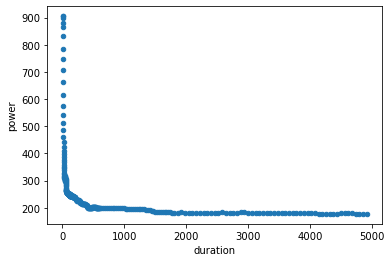

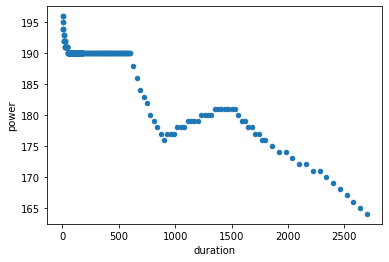

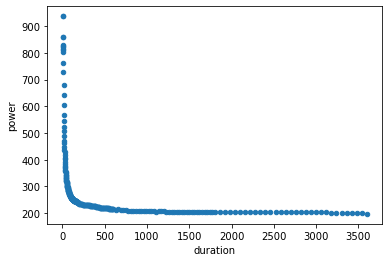

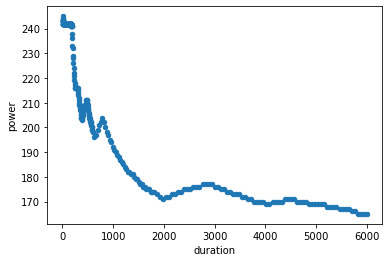

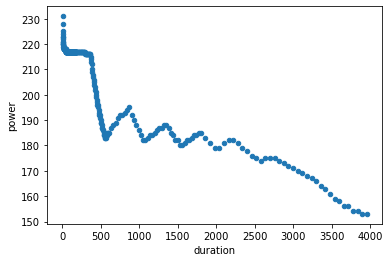

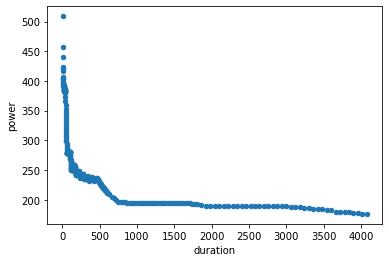

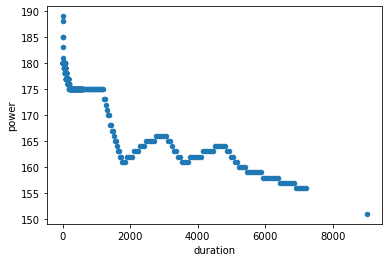

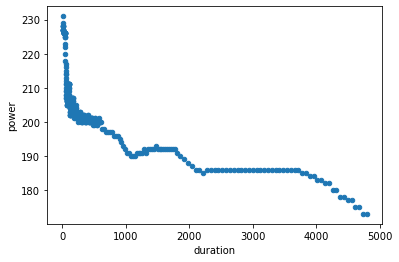

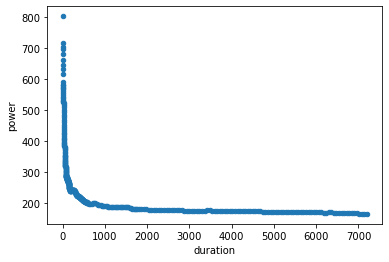

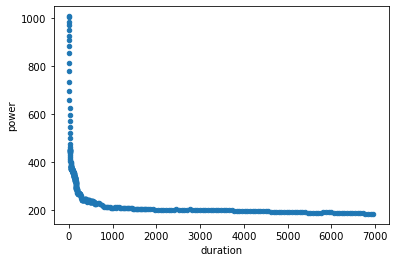

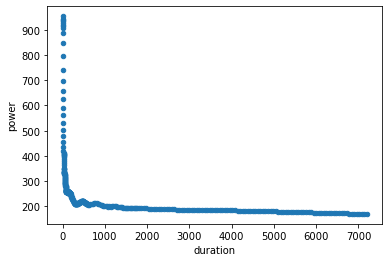

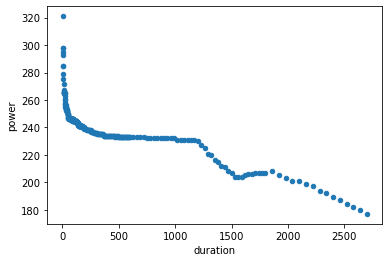

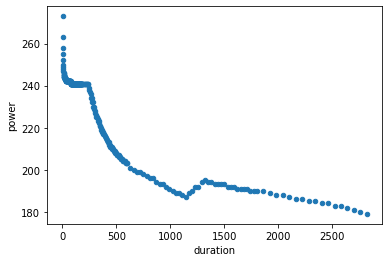

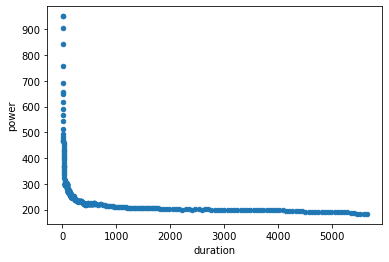

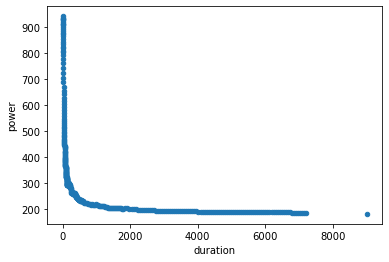

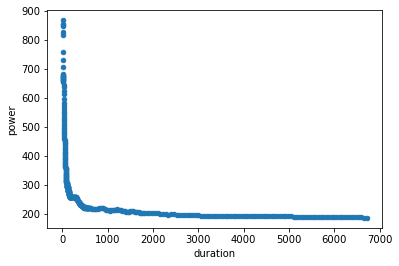

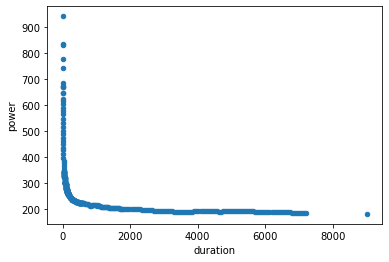

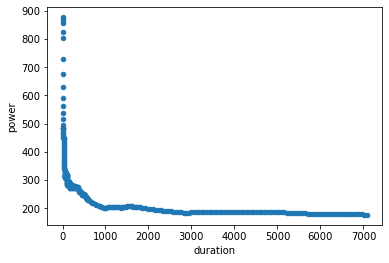

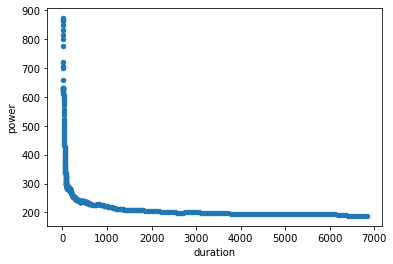

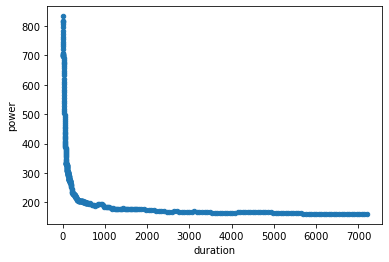

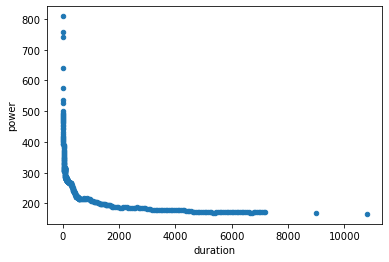

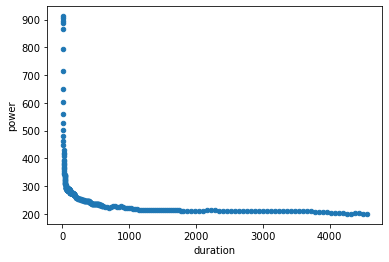

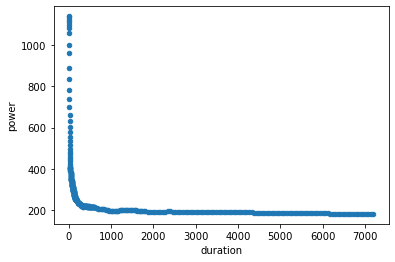

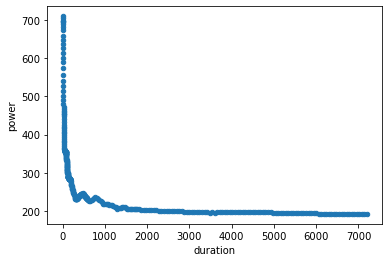

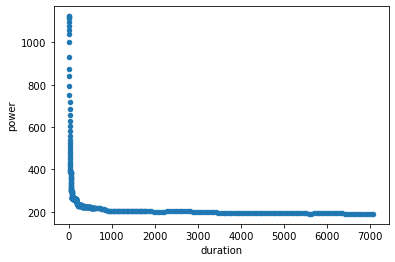

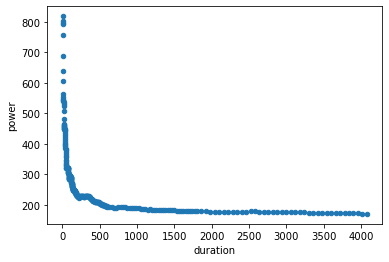

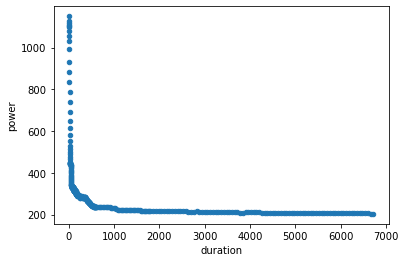

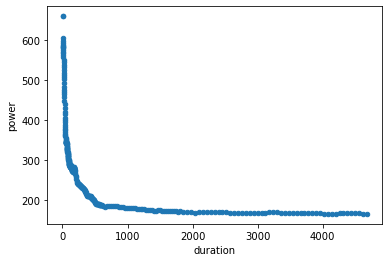

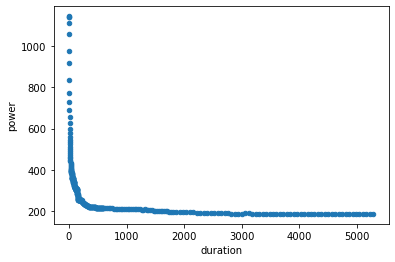

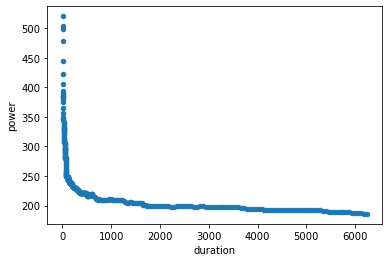

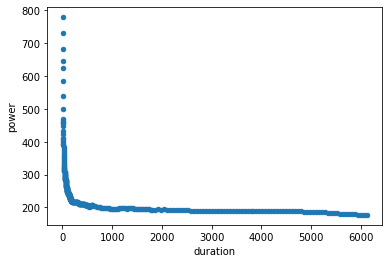

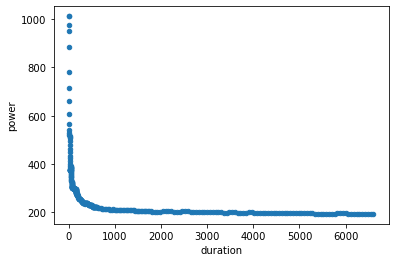

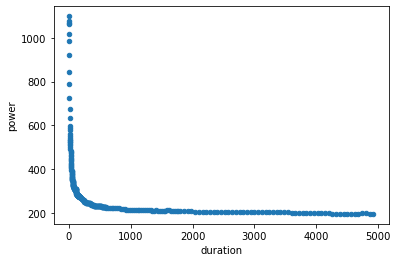

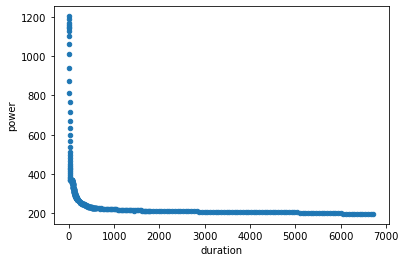

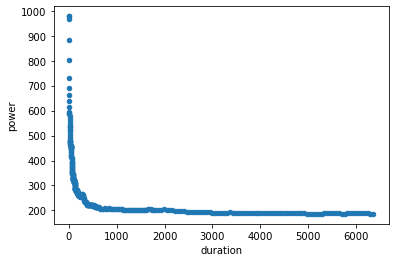

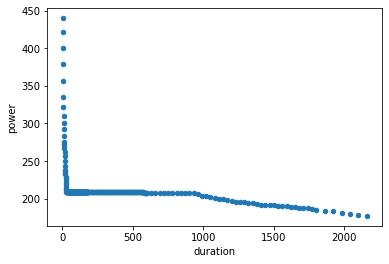

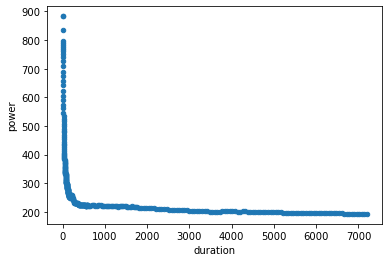

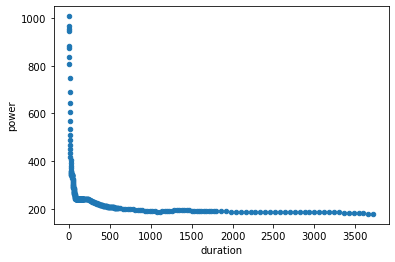

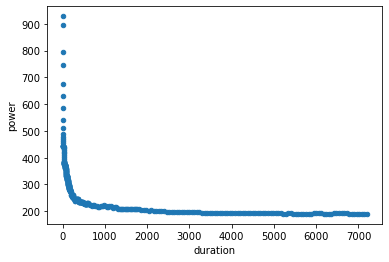

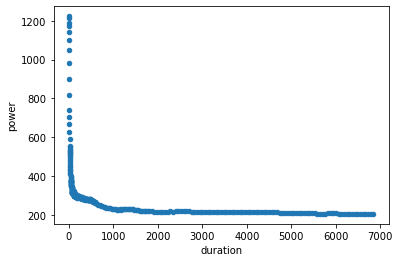

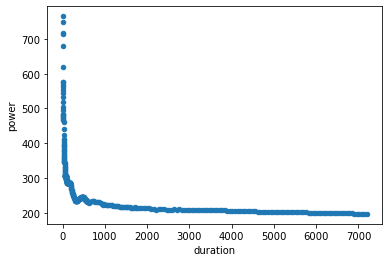

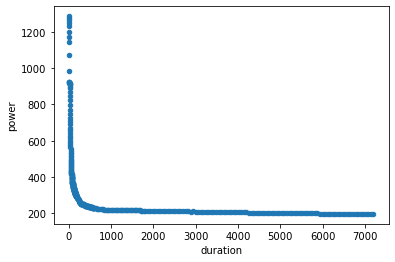

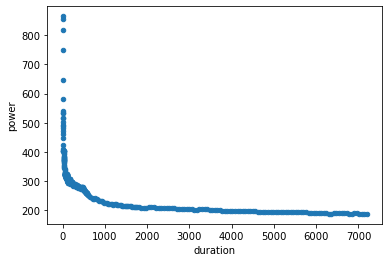

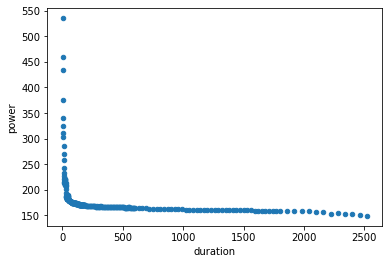

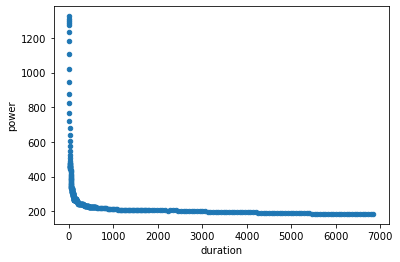

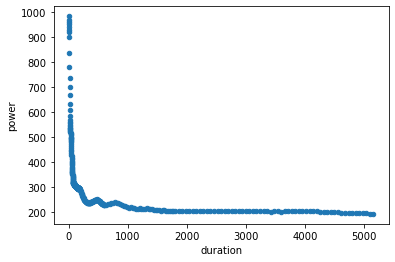

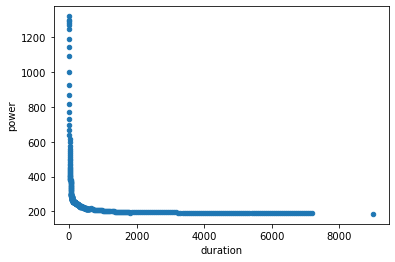

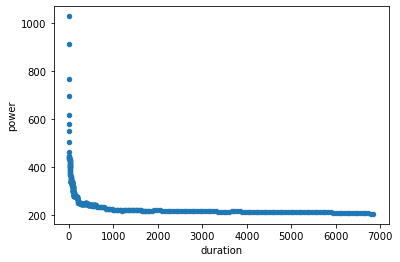

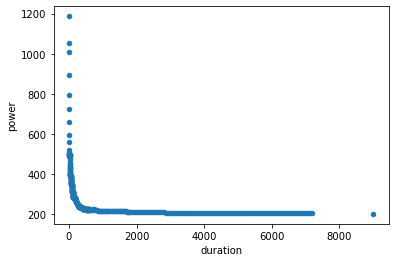

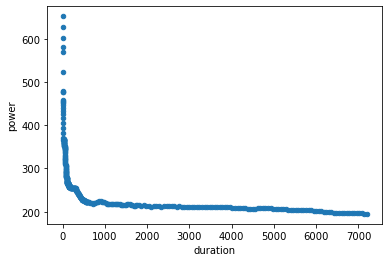

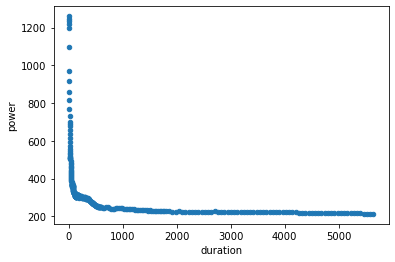

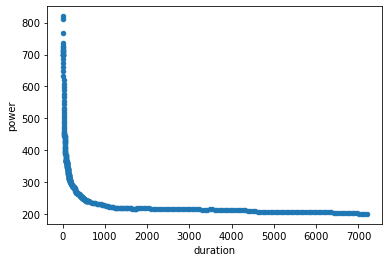

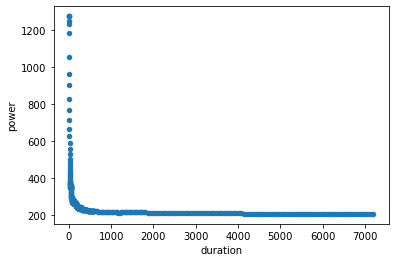

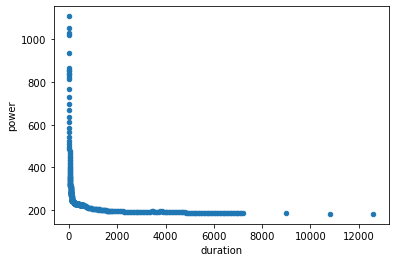

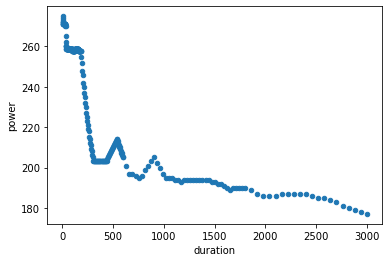

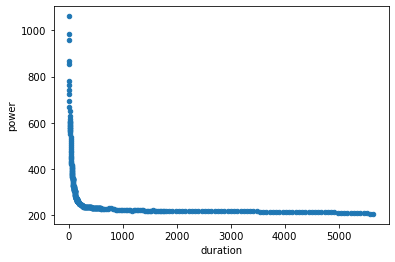

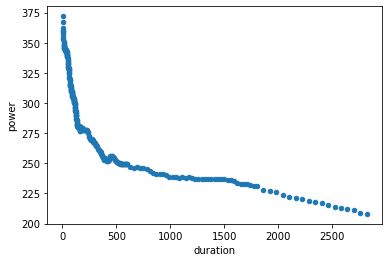

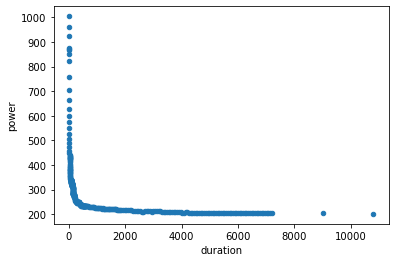

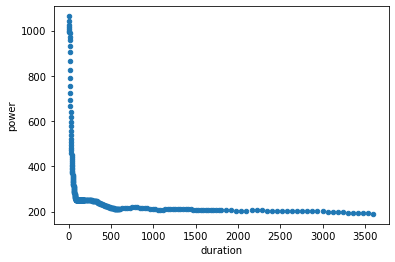

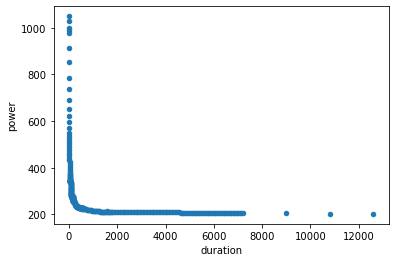

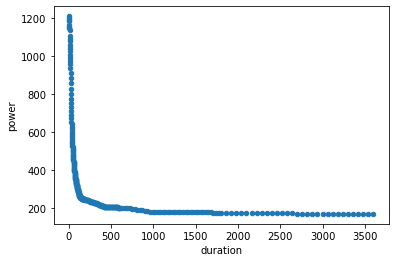

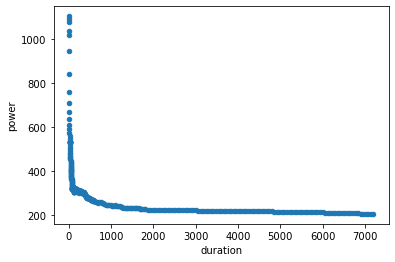

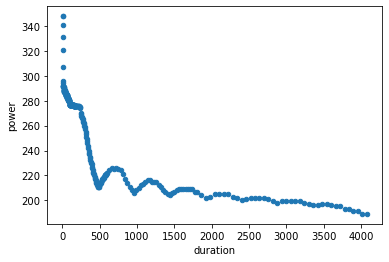

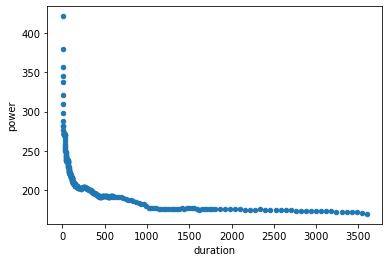

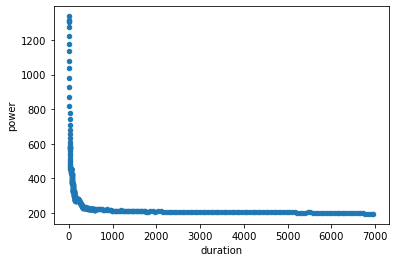

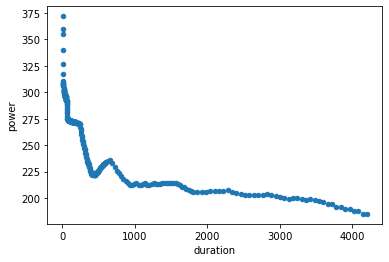

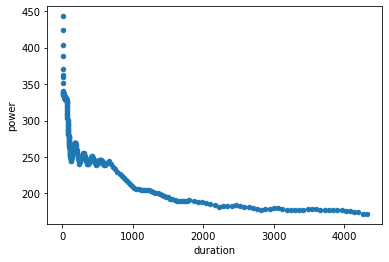

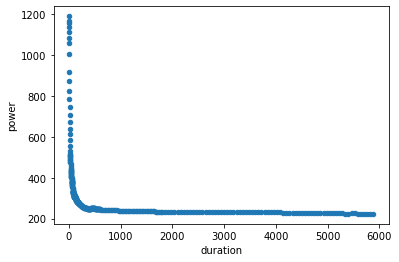

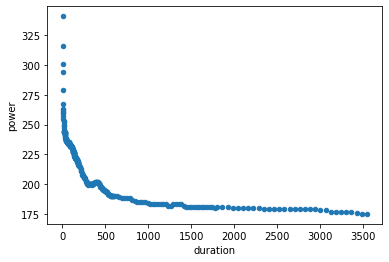

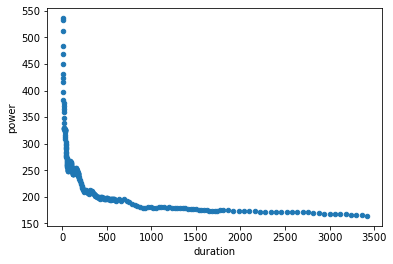

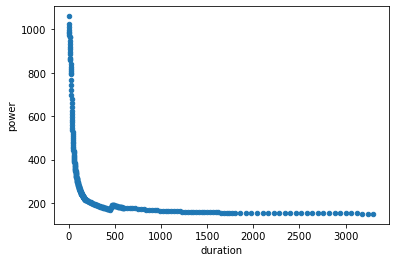

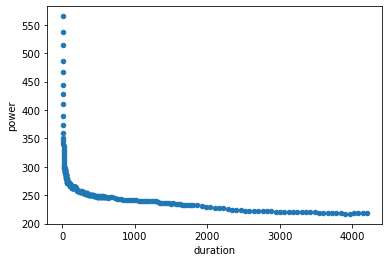

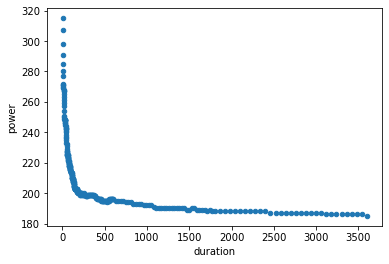

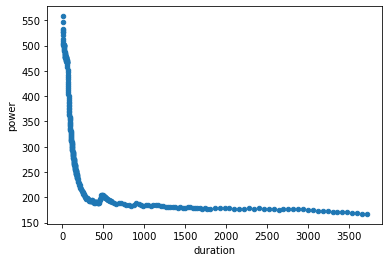

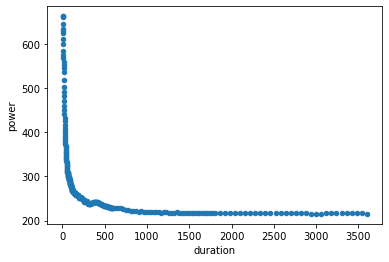

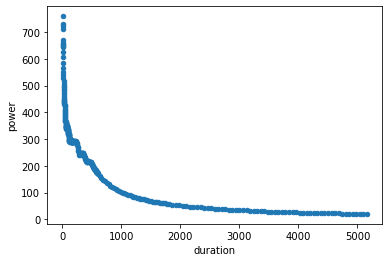

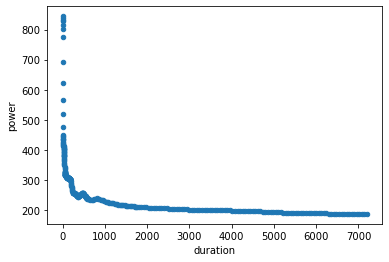

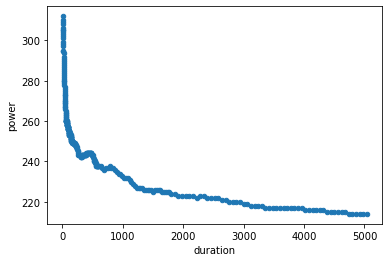

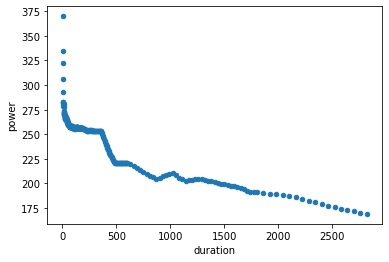

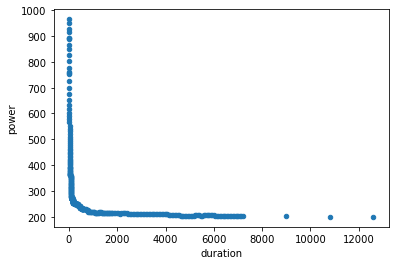

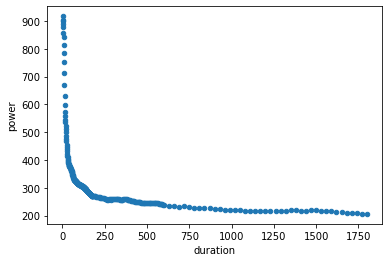

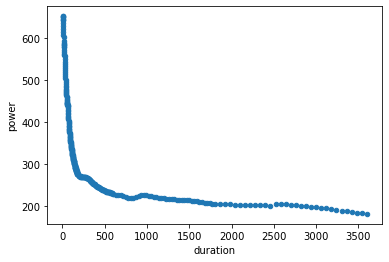

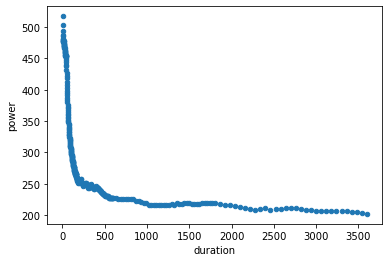

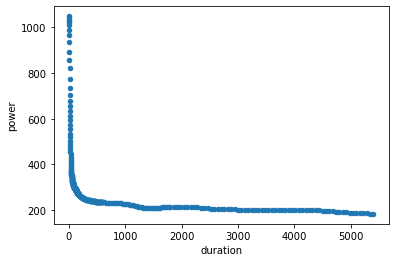

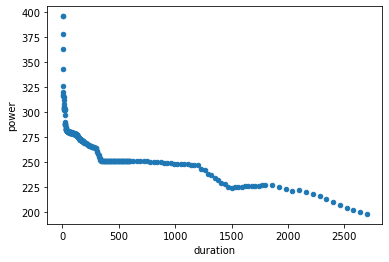

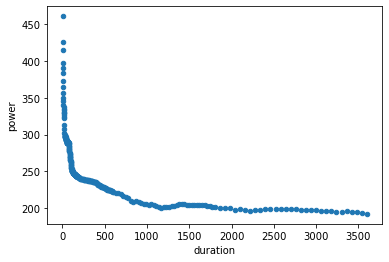

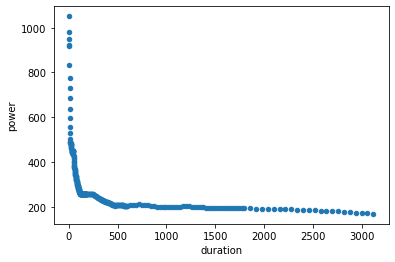

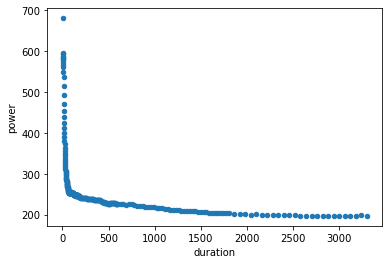

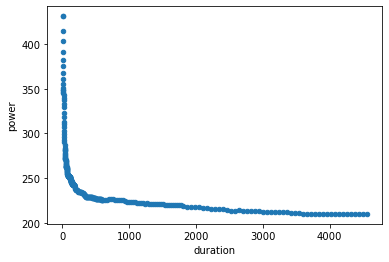

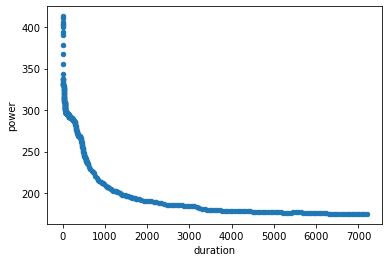

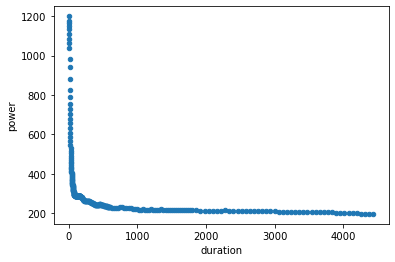

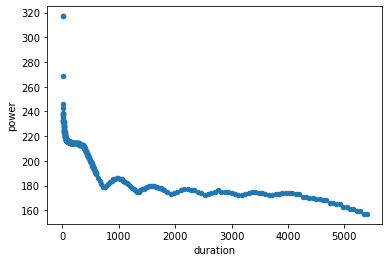

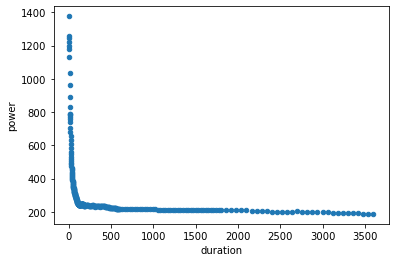

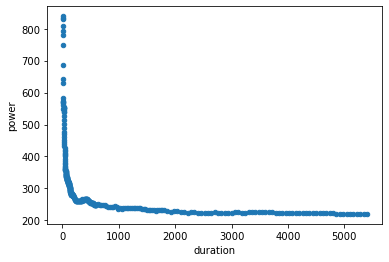

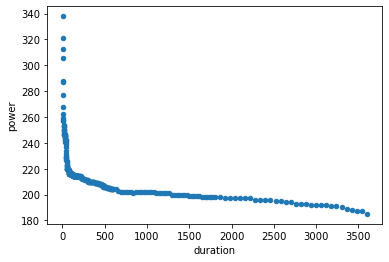

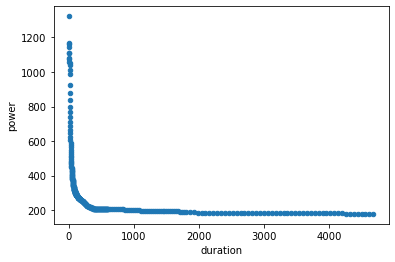

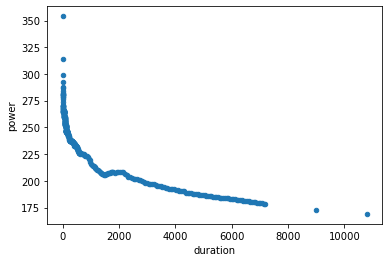

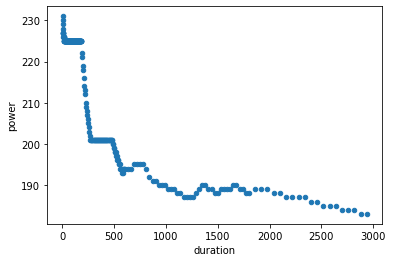

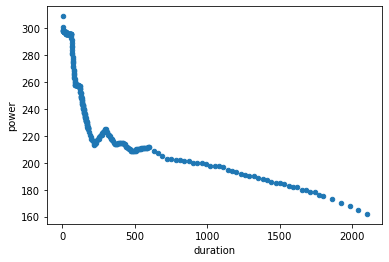

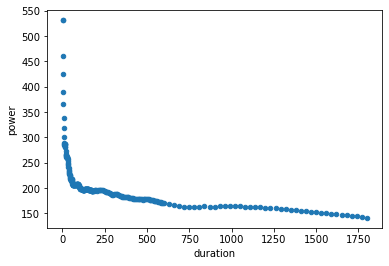

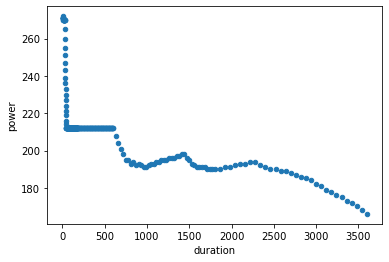

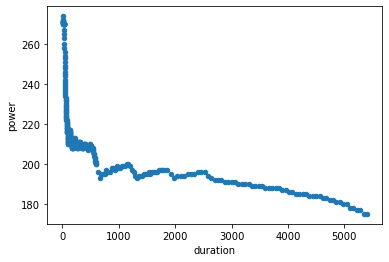

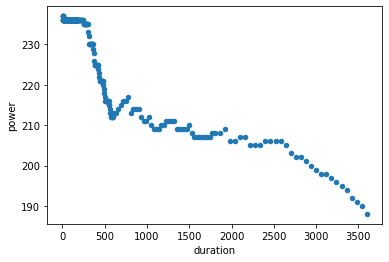

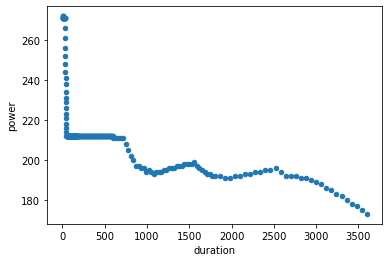

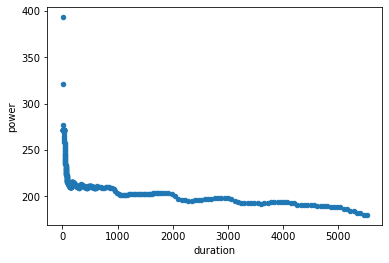

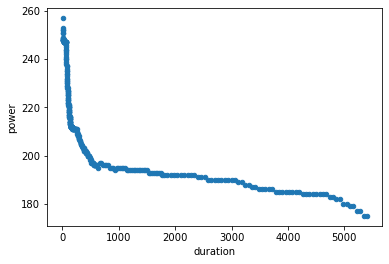

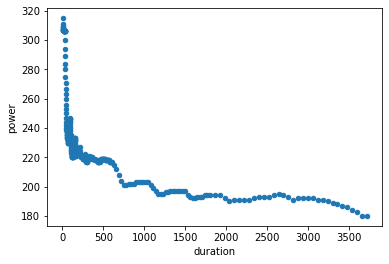

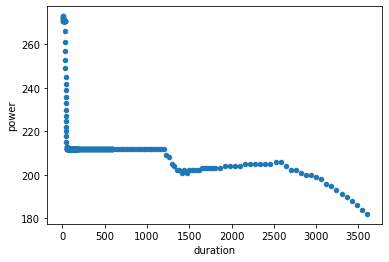

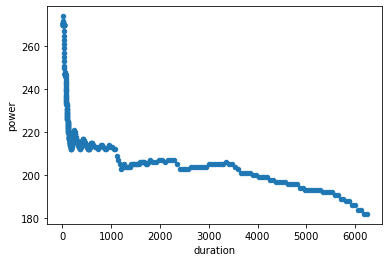

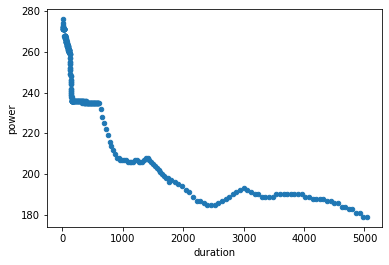

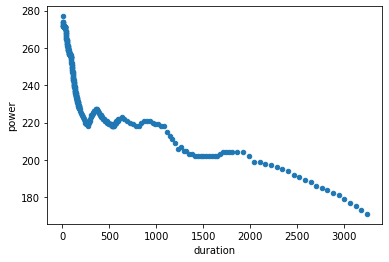

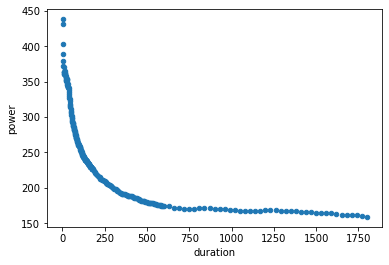

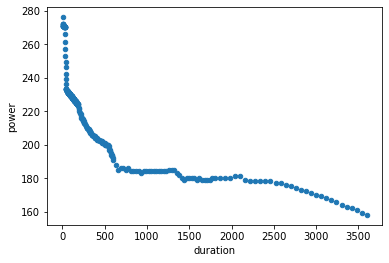

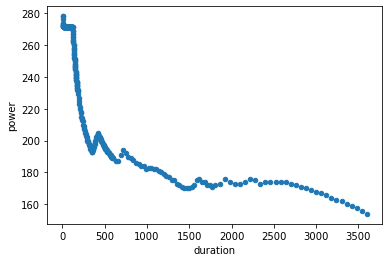

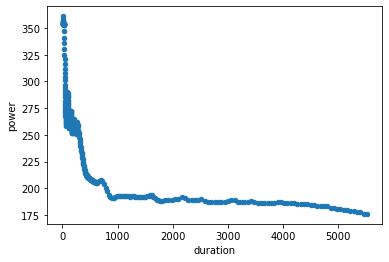

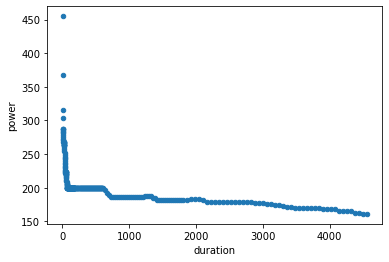

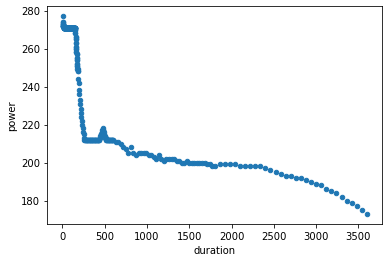

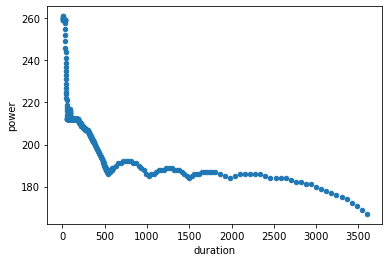

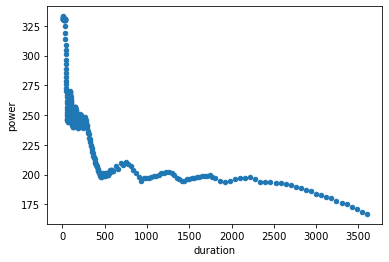

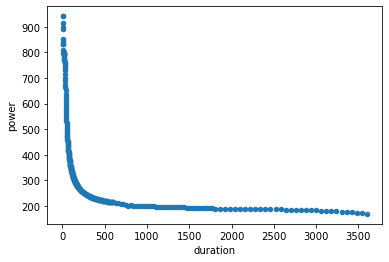

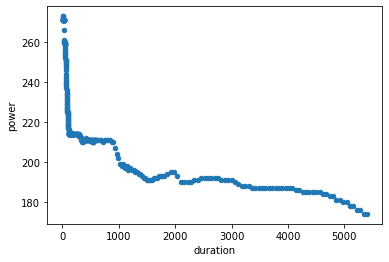

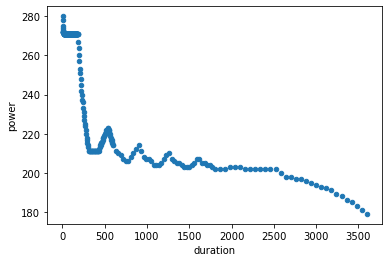

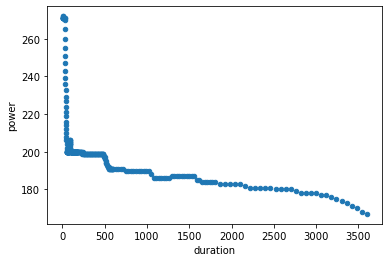

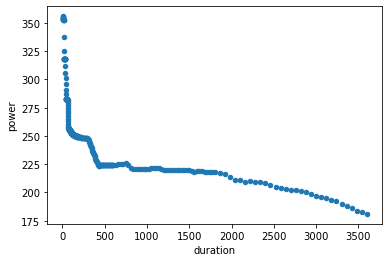

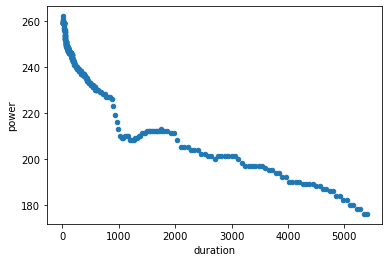

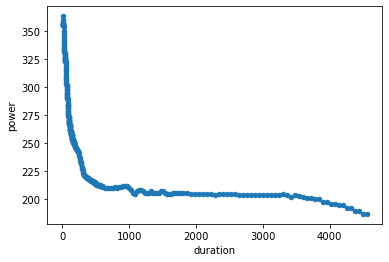

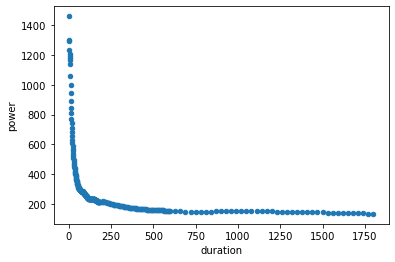

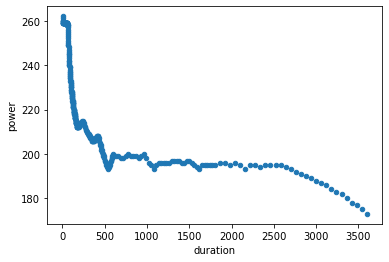

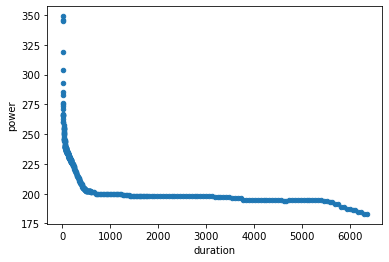

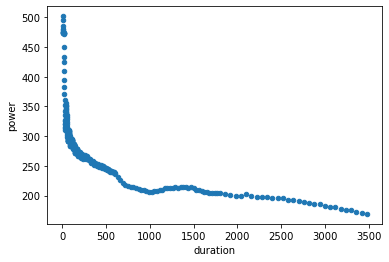

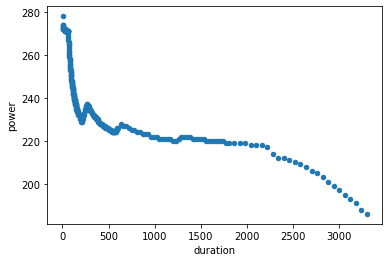

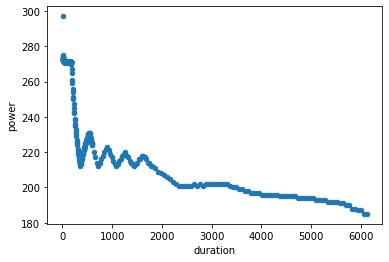

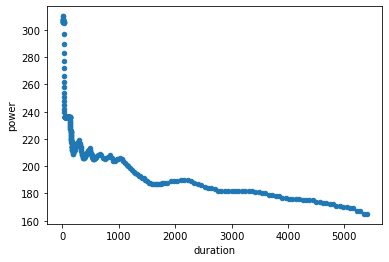

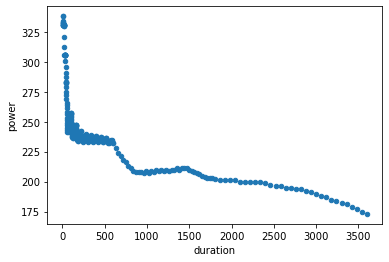

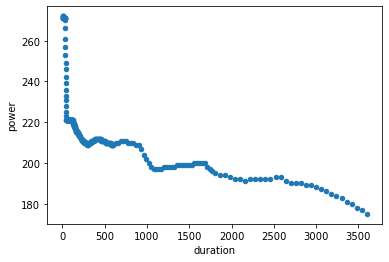

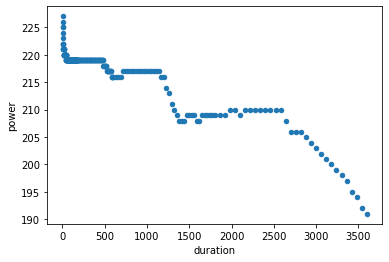

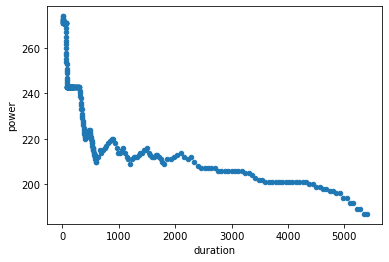

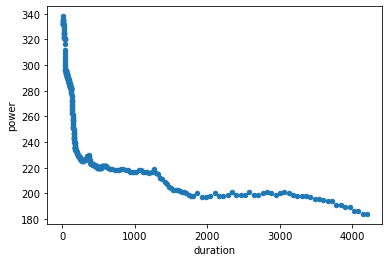

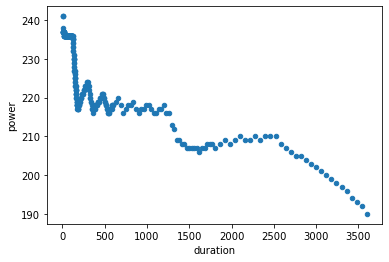

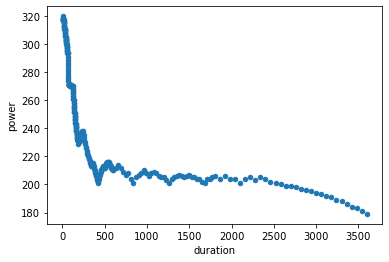

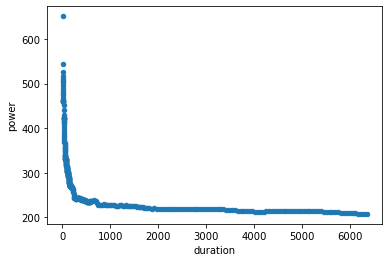

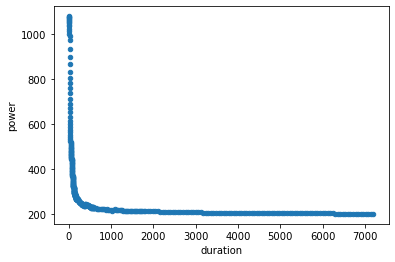

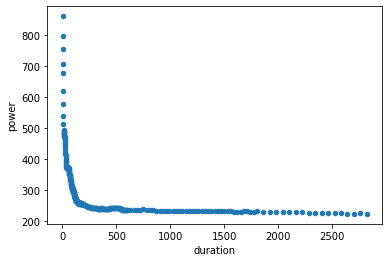

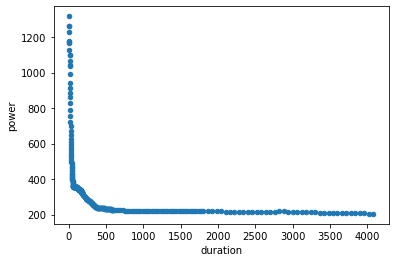

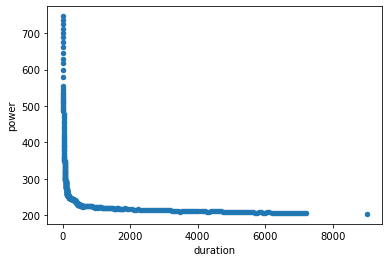

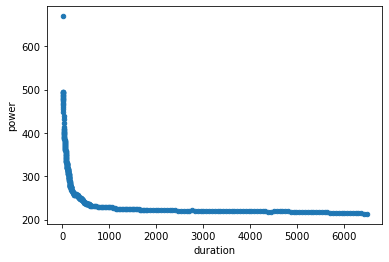

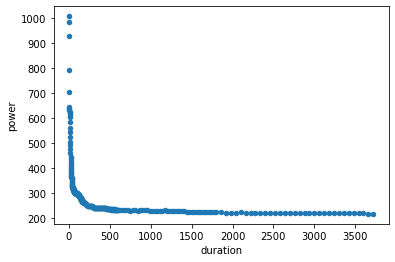

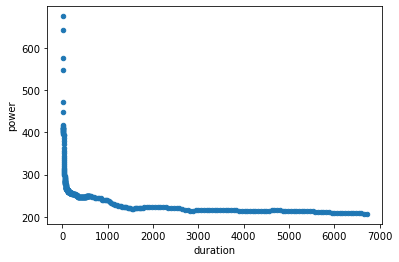

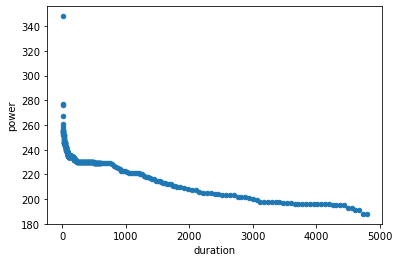

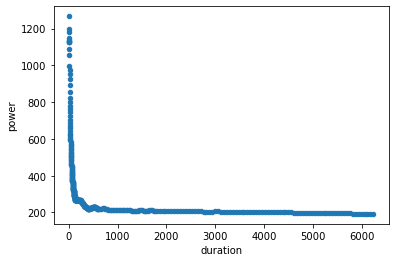

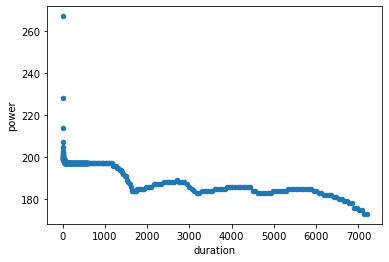

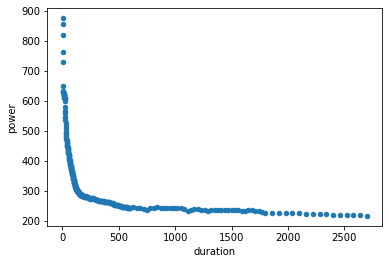

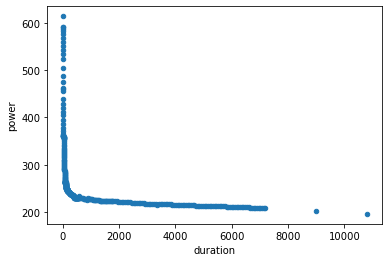

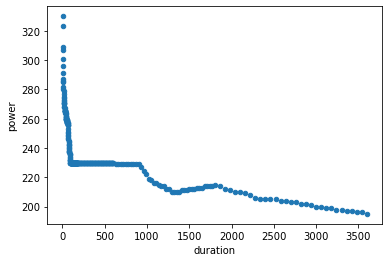

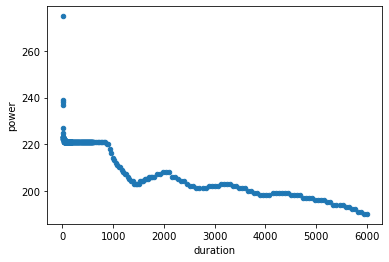

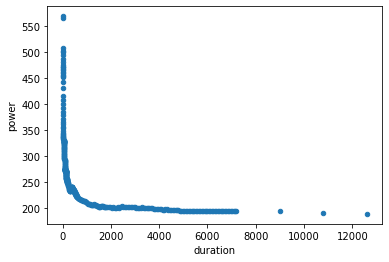

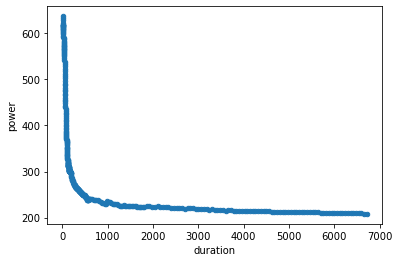

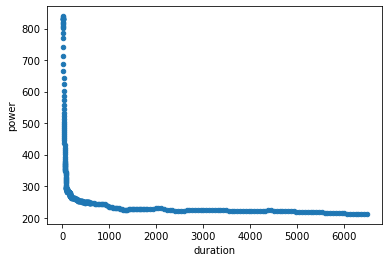

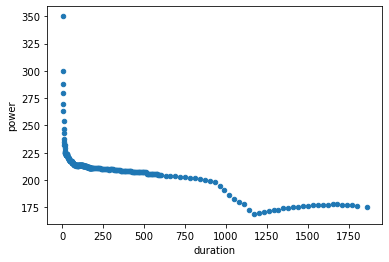

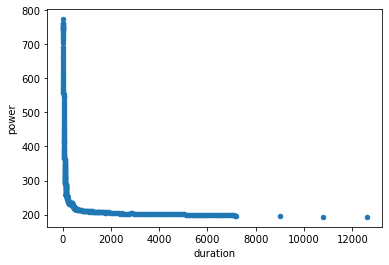

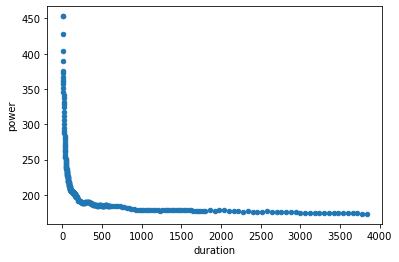

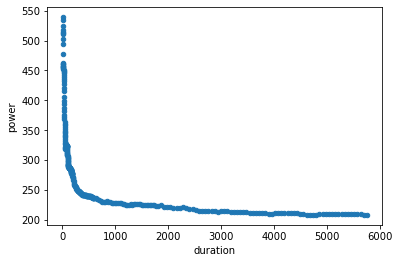

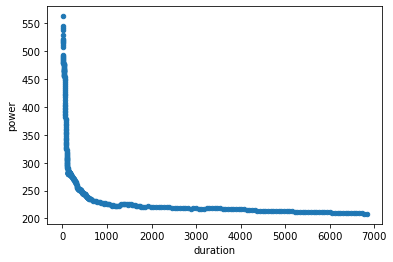

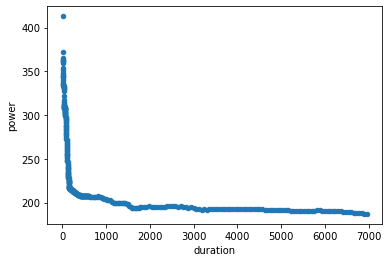

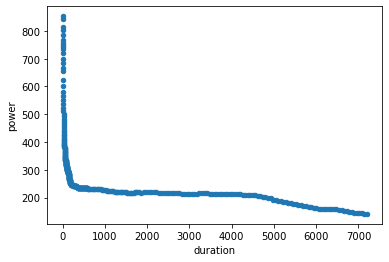

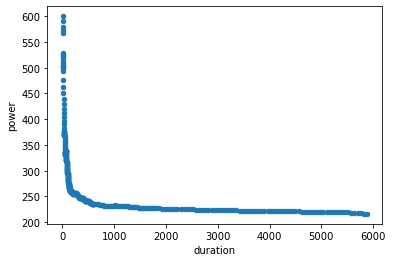

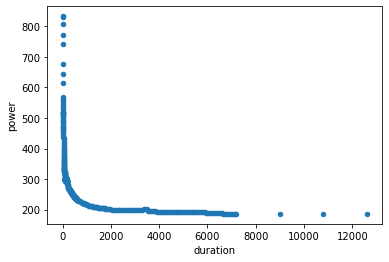

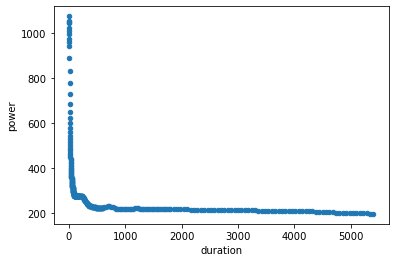

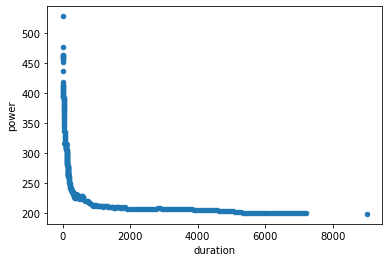

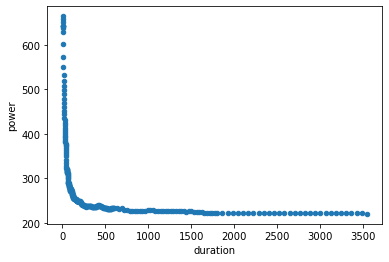

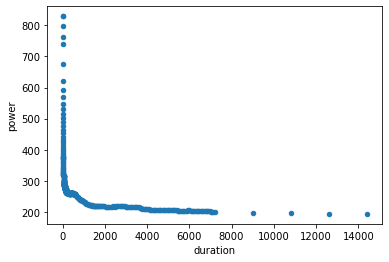

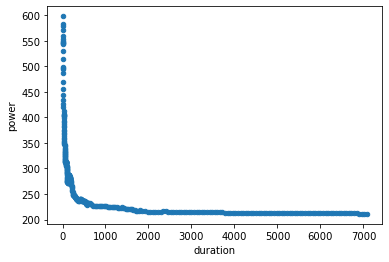

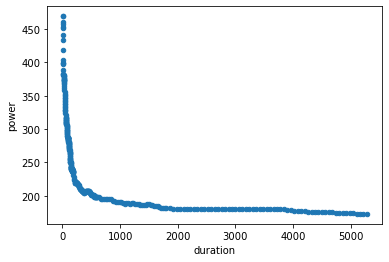

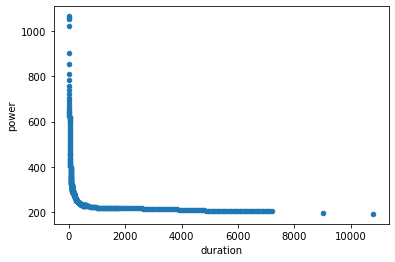

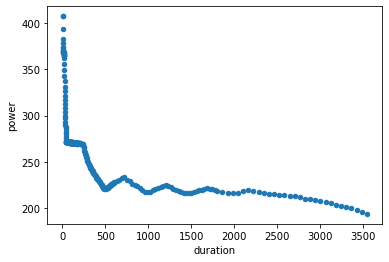

In [20]:
for activity in bike_activities:
    df = pd.DataFrame({'duration':activity.metadata['METRICS']['power_mmp_secs'], 'power':activity.metadata['METRICS']['power_mmp']})
    df.plot('duration', 'power', kind='scatter')

In [21]:
cpower = {}
#acc = []
for activity in bike_activities:
    for i in range(len(activity.metadata['METRICS']['power_mmp_secs'])):
    #for i in range(len(activity.metadata['METRICS']['power_mmp_secs'])):
        if activity.metadata['METRICS']['power_mmp_secs'][i] in cpower:
            cpower[activity.metadata['METRICS']['power_mmp_secs'][i]] = max(cpower[activity.metadata['METRICS']['power_mmp_secs'][i]],activity.metadata['METRICS']['power_mmp'][i])
        else:
            cpower[activity.metadata['METRICS']['power_mmp_secs'][i]] = activity.metadata['METRICS']['power_mmp'][i]

In [22]:
cpower

{1: 1460,
 2: 1316,
 3: 1309,
 4: 1305,
 5: 1273,
 6: 1247,
 7: 1192,
 8: 1164,
 9: 1137,
 10: 1096,
 11: 1077,
 12: 1057,
 13: 1040,
 14: 1025,
 15: 1007,
 16: 990,
 17: 975,
 18: 959,
 19: 939,
 20: 912,
 21: 884,
 22: 856,
 23: 827,
 24: 801,
 25: 776,
 26: 758,
 27: 756,
 28: 747,
 29: 739,
 30: 731,
 31: 716,
 32: 701,
 33: 687,
 34: 674,
 35: 666,
 36: 652,
 37: 638,
 38: 625,
 39: 613,
 40: 601,
 41: 590,
 42: 579,
 43: 569,
 44: 559,
 45: 550,
 46: 541,
 47: 532,
 48: 524,
 49: 518,
 50: 512,
 51: 507,
 52: 503,
 53: 496,
 54: 491,
 55: 487,
 56: 482,
 57: 478,
 58: 474,
 59: 469,
 60: 465,
 61: 460,
 62: 456,
 63: 452,
 64: 448,
 65: 443,
 66: 439,
 67: 435,
 68: 431,
 69: 428,
 70: 424,
 71: 420,
 72: 416,
 73: 412,
 74: 409,
 75: 405,
 76: 402,
 77: 399,
 78: 395,
 79: 392,
 80: 389,
 81: 386,
 82: 384,
 83: 382,
 84: 380,
 85: 378,
 86: 375,
 87: 373,
 88: 371,
 89: 369,
 90: 367,
 91: 366,
 92: 365,
 93: 365,
 94: 365,
 95: 364,
 96: 364,
 97: 363,
 98: 362,
 99: 361,
 100

In [23]:
powerDF = pd.DataFrame.from_dict(cpower, orient='index')

<AxesSubplot:>

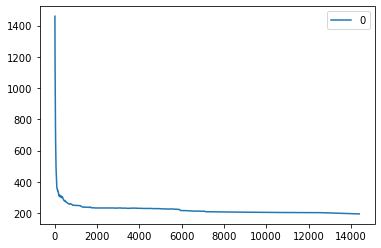

In [24]:
powerDF[:1000].plot()

<AxesSubplot:>

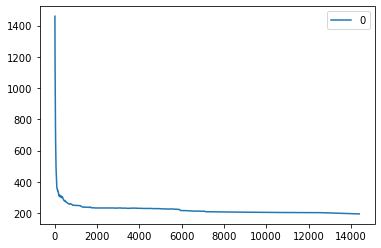

In [25]:
powerDF.plot()

In [30]:
def month(df):
    return parse(df['date']).month
#activityCP.apply(lambda row: month(row)

In [31]:
def create_dataset(data):
    criticalPower = pd.DataFrame()
    titles = ['activity','athlete','date','weight','duration','coggan_tss']
    #secs = data[2].metadata['METRICS']['power_mmp_secs']
    #index = titles + secs
    #print(index)
    i = 0
    for activity in data:
        rows = criticalPower
        s2 = pd.Series(activity.metadata['METRICS']['power_mmp'], index=activity.metadata['METRICS']['power_mmp_secs'])
        s1 = pd.Series([activity.id,athlete.metadata['ATHLETE']['id'],activity.metadata['date'],activity.metadata['METRICS']['athlete_weight'],activity.metadata['METRICS']['time_riding'],activity.metadata['METRICS']['coggan_tss']],index=titles)
        row = pd.concat([s1,s2])
        #criticalPower.append(row, ignore_index=True)
        criticalPower = pd.concat([rows, row.to_frame().T], ignore_index=True)
        
        #activityCP = pd.DataFrame([activity.metadata['METRICS']['power_mmp'][:5000]], columns=activity.metadata['METRICS']['power_mmp_secs'][:5000])
        #activityCP.insert(0,'activity',activity.id)
        #activityCP.insert(1,'athlete',athlete.metadata['ATHLETE']['id'])
        #activityCP.insert(2,'date',activity.metadata['date'])
        #activityCP.insert(3,'weight',activity.metadata['METRICS']['athlete_weight'])
        #activityCP.insert(4,'duration',activity.metadata['METRICS']['time_riding'])
        #activityCP.insert(5,'coggat_tss',activity.metadata['METRICS']['coggan_tss'])
        #activityCP.insert(6,'month',activityCP.apply(lambda row: month(row), axis=1))
        #activityCP.set_index('activity', inplace=True)
        #criticalPower = pd.concat([criticalPower,activityCP], axis=1)
        i = i + 1
        print(f'{i}/{len(data)}')
        #print('activityCP:')
        #print(activityCP)
        #print('criticalPower in progress:')
        #print(criticalPower)
    #criticalPower.set_index('activity',inplace=True)
    criticalPower['month'] = criticalPower.apply(lambda row: month(row), axis=1)
    return criticalPower


In [32]:
PowerDF = create_dataset(bike_activities)
PowerDF

1/232
2/232
3/232
4/232
5/232
6/232
7/232
8/232
9/232
10/232
11/232
12/232
13/232
14/232
15/232
16/232
17/232
18/232
19/232
20/232
21/232
22/232
23/232
24/232
25/232
26/232
27/232
28/232
29/232
30/232
31/232
32/232
33/232
34/232
35/232
36/232
37/232
38/232
39/232
40/232
41/232
42/232
43/232
44/232
45/232
46/232
47/232
48/232
49/232
50/232
51/232
52/232
53/232
54/232
55/232
56/232
57/232
58/232
59/232
60/232
61/232
62/232
63/232
64/232
65/232
66/232
67/232
68/232
69/232
70/232
71/232
72/232
73/232
74/232
75/232
76/232
77/232
78/232
79/232
80/232
81/232
82/232
83/232
84/232
85/232
86/232
87/232
88/232
89/232
90/232
91/232
92/232
93/232
94/232
95/232
96/232
97/232
98/232
99/232
100/232
101/232
102/232
103/232
104/232
105/232
106/232
107/232
108/232
109/232
110/232
111/232
112/232
113/232
114/232
115/232
116/232
117/232
118/232
119/232
120/232
121/232
122/232
123/232
124/232
125/232
126/232
127/232
128/232
129/232
130/232
131/232
132/232
133/232
134/232
135/232
136/232
137/232
138/232
139/

,activity,athlete,date,weight,duration,coggan_tss,1,2,3,4,...,6960,7020,7080,7140,7200,9000,10800,12600,14400,month
0,2017_10_26_16_12_03.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2017/10/26 14:12:03 UTC,80.00000,2704.00000,44.23449,1037,1027,1026,1022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,2017_10_27_16_19_00.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2017/10/27 14:19:00 UTC,80.00000,3007.00000,20.35122,331,331,255,223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,2017_10_29_04_48_58.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2017/10/29 03:48:58 UTC,80.00000,3485.00000,24.86239,296,296,296,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,2017_10_30_16_06_18.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2017/10/30 15:06:18 UTC,80.00000,2993.00000,19.88812,714,650,606,541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,2017_11_01_16_17_49.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2017/11/01 15:17:49 UTC,80.00000,4018.00000,36.60061,163,163,161,160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2019_04_14_10_24_55.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2019/04/14 08:24:55 UTC,80.00000,14714.00000,324.92949,829,829,798,763,...,202,201,201,201,201,198,196,195,194,4
228,2019_04_17_15_27_48.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2019/04/17 13:27:48 UTC,80.00000,7195.00000,184.79255,598,582,578,571,...,211,211,211,NaN,NaN,NaN,NaN,NaN,NaN,4
229,2019_04_18_13_30_12.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2019/04/18 11:30:12 UTC,80.00000,5392.00000,92.38299,469,469,461,458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
230,2019_04_19_09_54_21.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2019/04/19 07:54:21 UTC,80.00000,12383.00000,264.16591,1066,1058,1054,1022,...,203,203,203,203,203,197,192,NaN,NaN,4


In [33]:
PowerDF

,activity,athlete,date,weight,duration,coggan_tss,1,2,3,4,...,6960,7020,7080,7140,7200,9000,10800,12600,14400,month
0,2017_10_26_16_12_03.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2017/10/26 14:12:03 UTC,80.00000,2704.00000,44.23449,1037,1027,1026,1022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,2017_10_27_16_19_00.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2017/10/27 14:19:00 UTC,80.00000,3007.00000,20.35122,331,331,255,223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,2017_10_29_04_48_58.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2017/10/29 03:48:58 UTC,80.00000,3485.00000,24.86239,296,296,296,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,2017_10_30_16_06_18.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2017/10/30 15:06:18 UTC,80.00000,2993.00000,19.88812,714,650,606,541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,2017_11_01_16_17_49.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2017/11/01 15:17:49 UTC,80.00000,4018.00000,36.60061,163,163,161,160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2019_04_14_10_24_55.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2019/04/14 08:24:55 UTC,80.00000,14714.00000,324.92949,829,829,798,763,...,202,201,201,201,201,198,196,195,194,4
228,2019_04_17_15_27_48.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2019/04/17 13:27:48 UTC,80.00000,7195.00000,184.79255,598,582,578,571,...,211,211,211,NaN,NaN,NaN,NaN,NaN,NaN,4
229,2019_04_18_13_30_12.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2019/04/18 11:30:12 UTC,80.00000,5392.00000,92.38299,469,469,461,458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
230,2019_04_19_09_54_21.csv,{11bf3ef3-c7b3-4d8d-be36-9021982b51f3},2019/04/19 07:54:21 UTC,80.00000,12383.00000,264.16591,1066,1058,1054,1022,...,203,203,203,203,203,197,192,NaN,NaN,4


In [34]:
PowerDF[1200][0]

187

In [35]:
def calculate_ftp(dataFrame):
    #df = dataFrame
    ftp = []
    acc = []
    monftp = []
    mon = 0 #dataFrame['month'][0]
    x = 0
    for i, row in PowerDF.iterrows():
        x = x + 1
        if (mon==row['month']):
            if (np.isnan(row[1200])):
                #ftp = ftp + [np.nan]
                acc = acc + [np.nan]
            else:
                #ftp = ftp + [row[1200]]
                acc = acc + [row[1200]]
        else:
            if (len(acc)>0):
                monftp = [max(acc)] * x
            #print('monftp:',monftp)
            print('month:', mon, 'noactiv:', len(monftp))
            ftp = ftp + monftp
            x = 1
            monftp = []
            mon = row['month']
            if (np.isnan(row[1200])):
                acc = [np.nan]
            else:
                acc = [row[1200]]
    #df['ftp'] = ftp
    print(len(ftp))
    return ftp

In [47]:
PowerDF['ftp'] = calculate_ftp(PowerDF)
PowerDF

month: 0 noactiv: 0
month: 10 noactiv: 5
month: 11 noactiv: 16
month: 12 noactiv: 14
month: 1 noactiv: 15
month: 2 noactiv: 14
month: 3 noactiv: 12
month: 4 noactiv: 12
month: 5 noactiv: 10
month: 6 noactiv: 9
month: 7 noactiv: 12
month: 8 noactiv: 16
month: 9 noactiv: 11
month: 10 noactiv: 8
month: 11 noactiv: 14
month: 12 noactiv: 17
month: 1 noactiv: 20
month: 2 noactiv: 17
month: 3 noactiv: 16
238


ValueError: Length of values (238) does not match length of index (232)

In [37]:
FTParray = calculate_ftp(PowerDF)
FTParray

monftp: []
monftp: [187, 187, 187, 187]
monftp: [163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163]
monftp: [193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193]
monftp: [213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213]
monftp: [212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212]
monftp: [230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230]
monftp: [215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215]
monftp: [223, 223, 223, 223, 223, 223, 223, 223, 223]
monftp: [229, 229, 229, 229, 229, 229, 229, 229]
monftp: [238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238]
monftp: [240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240]
monftp: [239, 239, 239, 239, 239, 239, 239, 239, 239, 239]
monftp: [228, 228, 228, 228, 228, 228, 228]
monftp: [247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247]
monftp: [212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212]
monf

[187,
 187,
 187,
 187,
 163,
 163,
 163,
 163,
 163,
 163,
 163,
 163,
 163,
 163,
 163,
 163,
 163,
 163,
 163,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 213,
 213,
 213,
 213,
 213,
 213,
 213,
 213,
 213,
 213,
 213,
 213,
 213,
 213,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 215,
 215,
 215,
 215,
 215,
 215,
 215,
 215,
 215,
 215,
 215,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 223,
 229,
 229,
 229,
 229,
 229,
 229,
 229,
 229,
 238,
 238,
 238,
 238,
 238,
 238,
 238,
 238,
 238,
 238,
 238,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 239,
 239,
 239,
 239,
 239,
 239,
 239,
 239,
 239,
 239,
 228,
 228,
 228,
 228,
 228,
 228,
 228,
 247,
 247,
 247,
 247,
 247,
 247,
 247,
 247,
 247,
 247,
 247,
 247,
 247,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212,
 212

In [49]:
x = 1
month = 10
suma = 0
for i, row in PowerDF.iterrows():
    if(month==row['month']):
        x = x+1
    else:
        if(month>0):
            print('month:', month, ' noactiv:', x)
            suma = suma + x
        month = row['month']
        x = 1
print(suma)
    #h = row[1200]
    #print('month:', month, 'cpower:', h)

month: 10  noactiv: 5
month: 11  noactiv: 15
month: 12  noactiv: 13
month: 1  noactiv: 14
month: 2  noactiv: 13
month: 3  noactiv: 11
month: 4  noactiv: 11
month: 5  noactiv: 9
month: 6  noactiv: 8
month: 7  noactiv: 11
month: 8  noactiv: 15
month: 9  noactiv: 10
month: 10  noactiv: 7
month: 11  noactiv: 13
month: 12  noactiv: 16
month: 1  noactiv: 19
month: 2  noactiv: 16
month: 3  noactiv: 15
221
